# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

### USING PYTHON VERSION = 2.7

In [1]:
import sys
print(sys.version)

2.7.10 (default, Sep 23 2015, 04:34:14) 
[GCC 4.2.1 Compatible Apple LLVM 7.0.0 (clang-700.0.72)]


----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=100))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

**Hint:** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [3]:
# TODO: Total number of records
n_records = data.shape[0]

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = data[data["income"]=='>50K'].shape[0]

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = data[data["income"]=='<=50K'].shape[0]

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = (n_greater_50k*1.0/n_records)*100.0

# Print the results
print "Total number of records: {}".format(n_records)
print "Individuals making more than $50,000: {}".format(n_greater_50k)
print "Individuals making at most $50,000: {}".format(n_at_most_50k)
print "Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent)

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

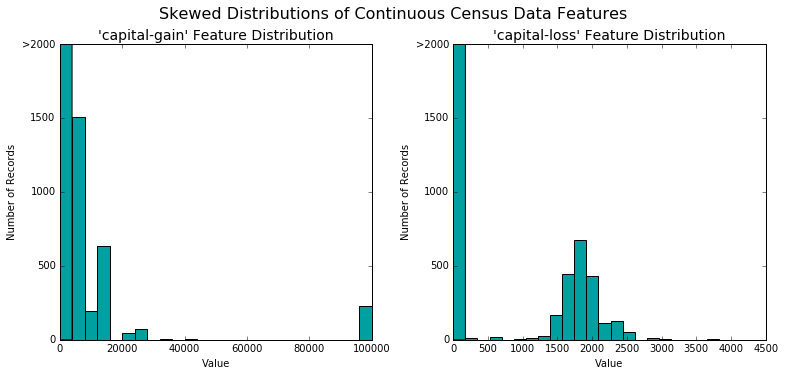

In [4]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

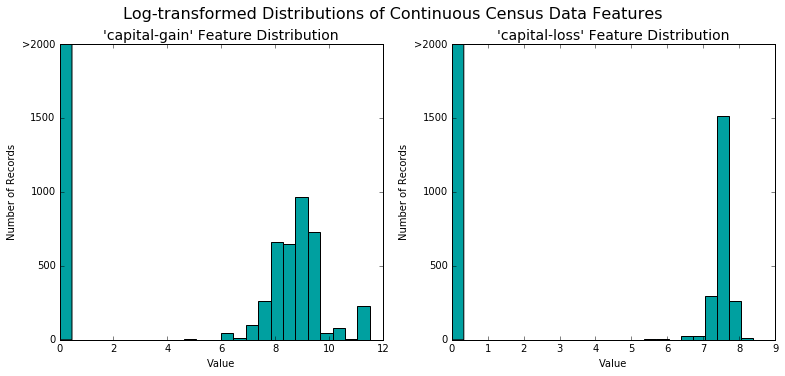

In [5]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_raw[skewed] = data[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_raw, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [6]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
features_raw[numerical] = scaler.fit_transform(data[numerical])

n_samples = features_raw.shape[0]
print("n_samples:",n_samples)

# Show an example of a record with scaling applied
display(features_raw.head(n = 1))

('n_samples:', 45222)


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.30137,State-gov,Bachelors,0.8,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_raw'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [7]:
print(income_raw)
print(pd.get_dummies(income_raw))

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
5        <=50K
6        <=50K
7         >50K
8         >50K
9         >50K
10        >50K
11        >50K
12       <=50K
13       <=50K
14       <=50K
15       <=50K
16       <=50K
17       <=50K
18        >50K
19        >50K
20       <=50K
21       <=50K
22       <=50K
23       <=50K
24        >50K
25       <=50K
26       <=50K
27       <=50K
28       <=50K
29       <=50K
         ...  
45192    <=50K
45193    <=50K
45194     >50K
45195     >50K
45196    <=50K
45197     >50K
45198     >50K
45199    <=50K
45200    <=50K
45201    <=50K
45202    <=50K
45203    <=50K
45204     >50K
45205    <=50K
45206    <=50K
45207    <=50K
45208    <=50K
45209    <=50K
45210    <=50K
45211    <=50K
45212    <=50K
45213    <=50K
45214    <=50K
45215    <=50K
45216    <=50K
45217    <=50K
45218    <=50K
45219    <=50K
45220    <=50K
45221     >50K
Name: income, dtype: object
       <=50K  >50K
0          1     0
1          1     0


In [16]:
# TODO: One-hot encode the 'features_raw' data using pandas.get_dummies()
features = pd.get_dummies(features_raw)

# TODO: Encode the 'income_raw' data to numerical values
income = income_raw=='>50K'
income = income.astype(int)

print "Income shape:",income.shape
print income

# Print the number of features after one-hot encoding
encoded = list(features.columns)
print "{} total features after one-hot encoding.".format(len(encoded))

# Uncomment the following line to see the encoded feature names
print encoded

Income shape: (45222,)
0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        1
8        1
9        1
10       1
11       1
12       0
13       0
14       0
15       0
16       0
17       0
18       1
19       1
20       0
21       0
22       0
23       0
24       1
25       0
26       0
27       0
28       0
29       0
        ..
45192    0
45193    0
45194    1
45195    1
45196    0
45197    1
45198    1
45199    0
45200    0
45201    0
45202    0
45203    0
45204    1
45205    0
45206    0
45207    0
45208    0
45209    0
45210    0
45211    0
45212    0
45213    0
45214    0
45215    0
45216    0
45217    0
45218    0
45219    0
45220    0
45221    1
Name: income, dtype: int64
103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workcl

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [17]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, income, test_size = 0.2, random_state = 0)



# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 

### Question 1 - Naive Predictor Performace
*If we chose a model that always predicted an individual made more than \$50,000, what would that model's accuracy and F-score be on this dataset?*  
**Note:** You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

In [18]:
# TODO: Calculate accuracy
accuracy = n_greater_50k*1.0/n_records

# TODO: Calculate F-score using the formula above for beta = 0.5
precision = n_greater_50k*1.0/n_records
recall = 1.0 # Because there is no false negatives. 
beta = 0.5
fscore = (1.0 + beta*beta)*( precision*recall*1.0/(beta*beta*precision*1.0 + recall)) 

# Print the results 
print "Precision: {:.4f}".format(precision)
print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)

Precision: 0.2478
Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen
- *Describe one real-world application in industry where the model can be applied.* (You may need to do research for this — give references!)
- *What are the strengths of the model; when does it perform well?*
- *What are the weaknesses of the model; when does it perform poorly?*
- *What makes this model a good candidate for the problem, given what you know about the data?*

**Answer: **
I think the following are useful algorithms to test:

### Random Forests
   These are used in fraud detection in payment systems. (Cannot reveal source unfortunately, but one my friends used it in his very well funded payment company.)
   
   Strengths 
   Random forests  
   * can model complex relationships as they are non-linear
   * if grown sufficiently deep have relatively low bias so I thikn these would be appropriate.
   * fast and flexible 
   * can mine high dimensional data 
   * performa well even in presence of large number of features and smaller numer of observations
   
   Weaknesses
   * Random Forests can overfit their data and its hard to figure out where to stop. 
   * Its slower than Decision Trees because a lot of trees have to be created. 
   
   I think this is a good candidate for this model because Random Forests work well empirically and we can learn more about the problem by looking at the major features used to split the decision trees used.


### SVM 
   This is used for Credit Risk Scoring. 
   (https://stats.stackexchange.com/questions/198067/when-is-logistic-regression-suitable)
   
   Strengths 
   * SVM is defined by a convex optimization problem (no local minima)  which can be solved by known methods. 
   * It can model non linear relationships.
   * Effective in High dimensional Spaces and where number of dimensions is greater than the number of samples.
   
   Weaknesses
   * For a large amount of training data, SVMs can be very slow in training.
   * A serious probem SVMs is the high algorithmin complexity and extensive memory requirements of the required quadratic programming. 
   * They do not directly provide probability estimates as they are focussed on maximizing a margin to the support vectors.
   
   Because of their ability to model non linearity well and because there could be a very well defined margin between >50K and <=50K classes, I thought this was a useful model to use. 
   
   
### Decision Trees

    Use of decision trees for identifying features to be used in implantable devices.
    Paper: Selection of myocardial electrogram features for use by implantable devices. IEEE Transactions on Biomedical Engineering,  40(8):727--735, August 1993.
    
    Decision trees have been used for the detection of physical particles
    Paper: AVID BOWSER-CHAO AND DEBRA L. DZIALO. Comparison of the use of binary decision trees and neural networks in top quark detection. Physical Review D: Particles and Fields, 47(5):1900, March 1993.

   Strengths 
   * Interpretability - we can figure out why they predict what they predict
   * Simple to visualize
   * Able to handle muti-output problems 
   * The cost of using the tree is logarithmic in the number of data points used to train the tree. 
   
   Weaknesses 
   * Overfit the data if the depth of the tree is large and the minimum number of samples required a leaf node is small
   * Can be unstable because small variations in the data might result in a completely different tree being generated. 
   * They create biased trees if some classes dominate. 
   
   This is a good fit for this model as we can explain precisely the working of the model usingthe features on which  the tree is split. We would be able to explain to employees of the charity what to look for in a donor. 

In [22]:
print("X Train")
print(X_train[0:2])
print("X Test")
print(X_test[0:2])
print("Y_TRAIN")
print(y_train[0:2])
print("Y_TEST")
print(y_test[0:2])

X Train
            age  education-num  capital-gain  capital-loss  hours-per-week  \
13181  0.410959       0.600000           0.0           0.0        0.500000   
10342  0.438356       0.533333           0.0           0.0        0.397959   

       workclass_ Federal-gov  workclass_ Local-gov  workclass_ Private  \
13181                       0                     0                   1   
10342                       0                     0                   1   

       workclass_ Self-emp-inc  workclass_ Self-emp-not-inc  \
13181                        0                            0   
10342                        0                            0   

                  ...              native-country_ Portugal  \
13181             ...                                     0   
10342             ...                                     0   

       native-country_ Puerto-Rico  native-country_ Scotland  \
13181                            0                         0   
10342                  

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [23]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner = learner.fit(X_train[0:sample_size],y_train[0:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set,
    #       then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test).astype(int)
    predictions_train = learner.predict(X_train[0:300]).astype(int)
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end-start
            
    # TODO: Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train[0:300],predictions_train)
        
    # TODO: Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    print(predictions_train[0:3])
    print(y_test[0:3].as_matrix())
    
    # TODO: Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train[0:300].as_matrix(),predictions_train,0.5)
        
    # TODO: Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test.as_matrix(),predictions_test,0.5)
       
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    # Return the results
    return results

In [24]:
print(y_test[0:20])
y_test.describe()


41387    0
35278    0
26950    0
29133    0
41794    0
39744    1
32755    0
6016     1
43034    0
12446    0
36702    0
15291    0
5752     0
11009    1
17770    0
4413     0
26405    0
2632     0
38848    1
36022    1
Name: income, dtype: int64


count    9045.000000
mean        0.243781
std         0.429386
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: income, dtype: float64

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

[0 0 0]
[0 0 0]
DecisionTreeClassifier trained on 361 samples.
[0 0 0]
[0 0 0]
DecisionTreeClassifier trained on 3617 samples.
[0 0 0]
[0 0 0]
DecisionTreeClassifier trained on 36177 samples.
[0 0 0]
[0 0 0]
RandomForestClassifier trained on 361 samples.
[1 0 0]
[0 0 0]
RandomForestClassifier trained on 3617 samples.
[0 0 0]
[0 0 0]
RandomForestClassifier trained on 36177 samples.
[0 0 0]
[0 0 0]
SVC trained on 361 samples.
[0 0 0]
[0 0 0]
SVC trained on 3617 samples.
[0 0 0]
[0 0 0]
SVC trained on 36177 samples.


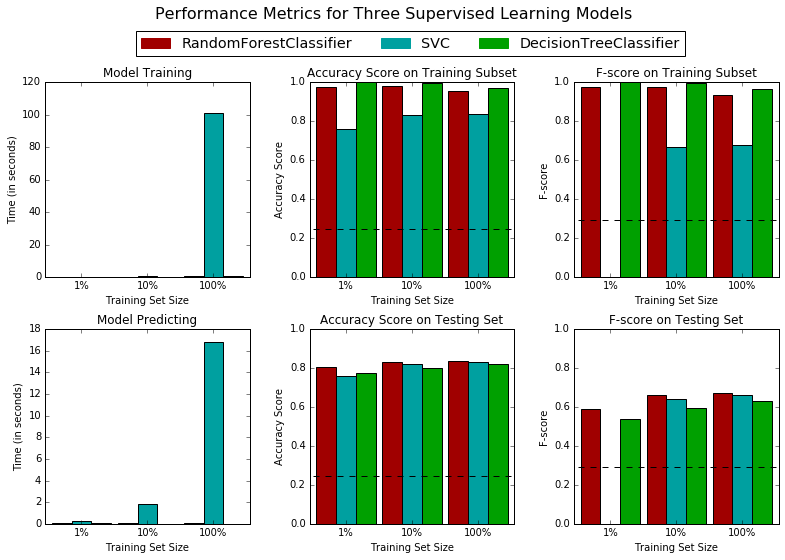

In [65]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# TODO: Initialize the three models
clf_A = DecisionTreeClassifier(random_state=0)
clf_B = RandomForestClassifier(random_state=0)
clf_C = SVC(random_state=0)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(0.01 * X_train.shape[0])
samples_10 = int(0.1 * X_train.shape[0])
samples_100 = X_train.shape[0]

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

In [66]:
print clf_A.feature_importances_
print clf_A.max_features_

[  1.65429233e-01   1.24383240e-01   1.20892968e-01   4.48202255e-02
   8.91310475e-02   6.22985979e-03   8.93123670e-03   1.27764428e-02
   7.52304195e-03   1.07266837e-02   6.15257395e-03   1.17477249e-04
   4.00453250e-04   1.19481597e-03   4.45667973e-04   3.37532659e-05
   2.86902761e-04   8.63033086e-04   5.84538228e-04   2.05209808e-03
   3.13053935e-03   2.78364002e-03   4.90243693e-04   7.43563691e-03
   3.59648535e-03   0.00000000e+00   5.84819086e-04   4.07951254e-03
   3.82227826e-03   3.86836516e-04   2.19621406e-01   1.08372453e-03
   2.81294009e-03   1.18967514e-03   1.22887368e-03   5.34885407e-03
   0.00000000e+00   9.64559288e-03   1.22375634e-02   4.13105154e-03
   3.31486129e-03   5.46866247e-03   4.51288346e-03   9.25803866e-05
   7.96521781e-03   3.43976082e-03   9.07875512e-03   5.27630511e-03
   5.22858988e-03   3.26959267e-03   3.24238204e-03   1.21030520e-03
   2.02330889e-03   1.41032829e-03   3.23960594e-03   1.22061610e-03
   2.80357295e-03   5.91101231e-03

In [67]:
for a in results:
    print a
    for t in sorted(results[a][2]):
        print "    ",t,results[a][2][t]

RandomForestClassifier
     acc_test 0.837700386954
     acc_train 0.956666666667
     f_test 0.671507260891
     f_train 0.933734939759
     pred_time 0.0473988056183
     train_time 0.605187892914
SVC
     acc_test 0.830071862908
     acc_train 0.836666666667
     f_test 0.659237536657
     f_train 0.677966101695
     pred_time 16.7833659649
     train_time 101.411535025
DecisionTreeClassifier
     acc_test 0.818684355998
     acc_train 0.97
     f_test 0.628170832949
     f_train 0.963855421687
     pred_time 0.0116548538208
     train_time 0.447031974792


----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model
*Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000.*  
**Hint:** Your answer should include discussion of the metrics, prediction/training time, and the algorithm's suitability for the data.

**Answer: ** I think the RandomForest will give the best accuracy and in prediction and trainig time. Also it can handle non linera decision boundaries so I expect this to be the best. 

 All values below are based on <b>using 100% of Training Set</b>. 

|   | SVM  | Decision Tree | Random Forest |
|---|---|---|---|
|F-score Test Set| 0.659| 0.628   | <span style="color:green">0.6715</span>  |
|Accuracy Test Set   | 0.830   | 0.819  | <span style="color:green">0.8377</span>   |
|Training Time   | <span style="color:red">101.41s</span>   | 0.45s  | 0.61s   |
|Prediction Time   | <span style="color:red">16.78s</span>   | 0.012s   | 0.047s   |
|Suitability   | Average  | High  | Highest  |
|   |   |   |   |

### Question 4 - Describing the Model in Layman's Terms
*In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

** My Answer ** 

## Random Forest 

A decision tree is similar to a list of 20 questions in the 20-questions game. In the game we ask 20 different questions to figure out the name of a famous person. 

We use the initial questions to cut out large sets of people. For eg: "Is the person dead?" helps us eliminate all alive famous people if they are dead and vice versa. 

In the game we try to maximize the number of people we can eliminate at each point. And in the final questions we should only need to eliminate one or two people at a time. 


The idea behind Random Forests is to train many different decision trees and then average their output to decrease the probability that we got the wrong answer. 

So we create a large number of 20-question lists and we use the average of their output to figure out the answer. Whatever answer the most nubmer of 20-question lists tell us, thats what we use as our final answer.








### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [48]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score

# TODO: Initialize the classifier
clf = RandomForestClassifier(random_state=0)

# TODO: Create the parameters list you wish to tune
parameters = {
    "max_depth":[5,6,7,8,9,10],
    "n_estimators":[10,20,30],
    "criterion":("gini","entropy")
}

# TODO: Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score,beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf,parameters,scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train,y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))

Unoptimized model
------
Accuracy score on testing data: 0.8377
F-score on testing data: 0.6715

Optimized Model
------
Final accuracy score on the testing data: 0.8557
Final F-score on the testing data: 0.7271


In [60]:
print best_clf.feature_importances_.shape

importances = best_clf.feature_importances_

important_features = {}
for idx,a in enumerate(encoded):
    important_features[a]=best_clf.feature_importances_[idx]

sorted(important_features)
import operator
print sorted(important_features.items(),key=operator.itemgetter(1))

(103,)
[('native-country_ Holand-Netherlands', 0.0), ('native-country_ Honduras', 0.0), ('native-country_ Columbia', 1.3229492118573414e-08), ('native-country_ Thailand', 1.8062250918016305e-06), ('native-country_ Haiti', 1.9522537916034183e-06), ('native-country_ Nicaragua', 2.2136526404919201e-06), ('native-country_ Scotland', 5.2919638512601049e-06), ('native-country_ Peru', 6.4195418217960662e-06), ('native-country_ Ecuador', 7.8521962051199209e-06), ('occupation_ Priv-house-serv', 1.1876875703667169e-05), ('native-country_ Laos', 1.4239540815081124e-05), ('occupation_ Armed-Forces', 1.7988378678324742e-05), ('native-country_ Outlying-US(Guam-USVI-etc)', 2.3061645439194941e-05), ('education_level_ Preschool', 2.4406064567118582e-05), ('native-country_ Trinadad&Tobago', 3.0917874480393367e-05), ('workclass_ Without-pay', 3.5346584340391968e-05), ('native-country_ Guatemala', 4.2552784101299956e-05), ('native-country_ Dominican-Republic', 4.5382452712947249e-05), ('native-country_ Ho

### Question 5 - Final Model Evaluation
_What is your optimized model's accuracy and F-score on the testing data? Are these scores better or worse than the unoptimized model? How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  
**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Benchmark Predictor | Unoptimized Model | Optimized Model |
| :------------: | :-----------------: | :---------------: | :-------------: | 
| Accuracy Score |     0.2478          |    0.8377               |   0.8557              |
| F-score        |      0.2917         |     0.6715              |   0.7271       |


**Answer: **

Optimized models accuracy is 85.57% and F-Score is 0.7271. These scores are better than the optimized model. And the optimized model's accuracy is more than 3x better than the Benchmark predictor's accuracy and the F-score is more than 2x better than the Benchmark predictor's accuracy. 

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data.  
_Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?_

**Answer:**


## Features Important for Prediction

I think the most important for prediction by order and reason are:

1. education
   <br/> I think education is the most important attribute that would explain if someone made >50K. Anyone with education  above a Bachelors would more likely have a higher income.
2. capital-gain
   <br/> The next factor I would believe that makes a difference would be the savings of a particular donor. The more capital available the higher the probability that someone >50K and would be a donor.
3. martial status
   <br/> I think the martial status would also make a difference. I.e. married people would be much more likely to make >50K and be a donor.
4. capital-loss 
   <br/> I also think that the amount of debt someone is in can neagatively correlates with the amount of money they make and thus their ability to be a donor. 
4. sex
   <br/>I would think women would more likely be a donor. 
   
   

## All Attributes - For Reference

age: continuous. 

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 

education-num: continuous. 

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners,Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 

sex: Female, Male. 

capital-gain: continuous. 

capital-loss: continuous. 

hours-per-week: continuous. 

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

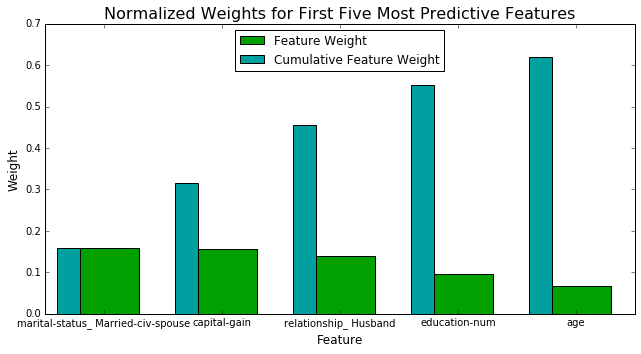

In [61]:
# TODO: Import a supervised learning model that has 'feature_importances_'
# I USED a RandomForest as my main algorithm.

# DONE ABOVE

# TODO: Train the supervised model on the training set 
model = best_clf

# TODO: Extract the feature importances
importances = best_clf.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
_How do these five features compare to the five features you discussed in **Question 6**? If you were close to the same answer, how does this visualization confirm your thoughts? If you were not close, why do you think these features are more relevant?_

**Answer:**

|Attribute   | Actually Relevant   | Disscussion  |    |
|---|---|---|---|
| Education Level   | No  | The level of education wasn't important but above chart shows that the number of years of education makes a difference.   |   |
| Capital Gain  | Yes  | This was the second most imporant predictive feature in the above chart so its confirms my thoughts.   |   |
| Martial Status  | Yes   | Martial status and specifically being married was a predictive feature as I had thought. This was the most predictive feature in the above graph.  |   |
| Capital Loss  | No  | The above graph implies that the capital loss is not as an important factor as I thought. So this implies that donors who are in debt are more likely to make >50K than I would have thought. And it looks like being a husband is more important feature than the amount of debt.  |   |
| Sex | No  | So it looks like sex does not make as much a difference as I would have thought. Infact women make less and thus are less likely to make >50k I would think. Age is a much more important feature than sex as given by above chart.  |   |


### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [62]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print "Final Model trained on full data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))
print "\nFinal Model trained on reduced data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5))

Final Model trained on full data
------
Accuracy on testing data: 0.8557
F-score on testing data: 0.7271

Final Model trained on reduced data
------
Accuracy on testing data: 0.8462
F-score on testing data: 0.7046


In [64]:
print "smaller model accuracy as percentage of larger modeles:",0.8462/0.8557*100.0
print "difference in f-score",0.7271 - 0.7046

smaller model accuracy as percentage of larger modeles: 98.8897978263
difference in f-score 0.0225


### Question 8 - Effects of Feature Selection
*How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?*  
*If training time was a factor, would you consider using the reduced data as your training set?*

**Answer:**

The Accuracy of the model using only 5 features is 98.89% that of the model using all features. 

The f-score of the model using only 5 features is only 0.0225 less than the f-score of the model created using all features. 

If training time was a factor then I would definitely consider using the reduced data. 


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.